In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
device = torch.device('cuda:0')

In [3]:
from utils.test_utils import obtain_AL_ckpts, split_AL_loaders
from utils.test_utils import load_AL_config, load_AL_dataloader, load_test_model

In [4]:
save_dir = '../results/lsac/220220_1758'
config_file, state_list, data_files = obtain_AL_ckpts(save_dir)

In [5]:
print(state_list, data_files)

['binaryNN_0.pt', 'binaryNN_1.pt', 'binaryNN_2.pt', 'binaryNN_3.pt', 'binaryNN_4.pt', 'binaryNN_5.pt', 'binaryNN_6.pt', 'binaryNN_7.pt', 'binaryNN_8.pt', 'binaryNN_9.pt'] ['final_dataloader.pkl', 'test_loader.pkl']


### load models and train data loaders

In [6]:
args = load_AL_config(save_dir, config_file)
dl_loader = load_AL_dataloader(args.save_dir,data_files[0])
test_loader = load_AL_dataloader(args.save_dir,data_files[1])

In [7]:
dl_loaders,dl_cum_loaders = split_AL_loaders(dl_loader, args)

/home/srp/research/Fairness/fairness_AL/codes/utils/data_utils.py:141: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensors = (torch.tensor(da).clone().detach().float() for da in dataarrays)


In [8]:
from utils.test_utils import test_groupwise, test_model

In [9]:
for it,st in enumerate(state_list):
    print("="*50)
    clf,clf_criterion = load_test_model(save_dir, st, args)
    _, acc = test_model(clf, dl_cum_loaders[it],clf_criterion, device, args.problem_type)
    _, acc2 = test_model(clf, test_loader,clf_criterion, device, args.problem_type)
    print("cumulated total training/test acc:", acc,"/",acc2)
    test_groupwise(clf, dl_cum_loaders[it],clf_criterion, device, 
               AL_select = args.AL_select, problem_type = args.problem_type, return_loader=False)
    print("test set performance")
    test_groupwise(clf, test_loader,clf_criterion, device, 
               AL_select = args.AL_select, problem_type = args.problem_type, return_loader=False)
    print('-'*50)
    for i in range(it+1):
        _, acc = test_model(clf, dl_loaders[i],clf_criterion, device, args.problem_type)
        print("data loader",i, "acc:",acc)
        test_groupwise(clf, dl_loaders[i],clf_criterion, device, 
               AL_select = args.AL_select, problem_type = args.problem_type, return_loader=False)
        print("")

loaded model is binaryNN_0.pt


/home/srp/research/Fairness/fairness_AL/codes/utils/eval_utils.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred = torch.tensor(output>thr,dtype = torch.float32)


cumulated total training/test acc: tensor(80.) / tensor(80.1280)
0.0 : loss 0.41765591502189636 / acc 83.01886749267578
1.0 : loss 0.526275634765625 / acc 76.59574127197266
test set performance
0.0 : loss 0.47276654839515686 / acc 81.00608825683594
1.0 : loss 0.49618586897850037 / acc 79.02632141113281
--------------------------------------------------
data loader 0 acc: tensor(80.)
0.0 : loss 0.41765591502189636 / acc 83.01886749267578
1.0 : loss 0.526275634765625 / acc 76.59574127197266

loaded model is binaryNN_1.pt
cumulated total training/test acc: tensor(78.0303) / tensor(80.0151)
0.0 : loss 0.43074727058410645 / acc 82.66666412353516
1.0 : loss 0.5611954927444458 / acc 71.92982482910156
test set performance
0.0 : loss 0.46633613109588623 / acc 80.96097564697266
1.0 : loss 0.4950008988380432 / acc 78.82819366455078
--------------------------------------------------
data loader 0 acc: tensor(77.)
0.0 : loss 0.44506901502609253 / acc 81.13207244873047
1.0 : loss 0.5590066313743591 

cumulated total training/test acc: tensor(81.4607) / tensor(80.1406)
0.0 : loss 0.4457628130912781 / acc 79.89949798583984
1.0 : loss 0.4226762354373932 / acc 83.43949127197266
test set performance
0.0 : loss 0.4574011266231537 / acc 80.89330291748047
1.0 : loss 0.4789751172065735 / acc 79.19615173339844
--------------------------------------------------
data loader 0 acc: tensor(83.)
0.0 : loss 0.38712531328201294 / acc 83.01886749267578
1.0 : loss 0.491441547870636 / acc 82.97872161865234

data loader 1 acc: tensor(81.2500)
0.0 : loss 0.3977802097797394 / acc 86.36363220214844
1.0 : loss 0.4957476556301117 / acc 70.0

data loader 2 acc: tensor(65.6250)
0.0 : loss 0.624137282371521 / acc 62.5
1.0 : loss 0.5863362550735474 / acc 68.75

data loader 3 acc: tensor(71.8750)
0.0 : loss 0.6691550016403198 / acc 64.28571319580078
1.0 : loss 0.514842689037323 / acc 77.77777099609375

data loader 4 acc: tensor(78.1250)
0.0 : loss 0.5002748966217041 / acc 77.77777099609375
1.0 : loss 0.485389292

In [10]:
from utils.data_utils import dataset_description, dl2nparray

data loader 0


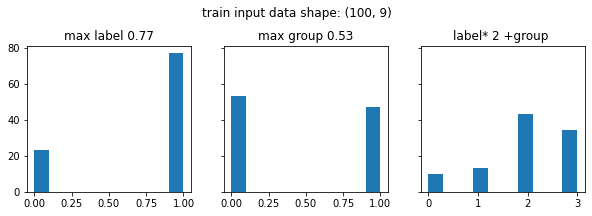

data loader 1


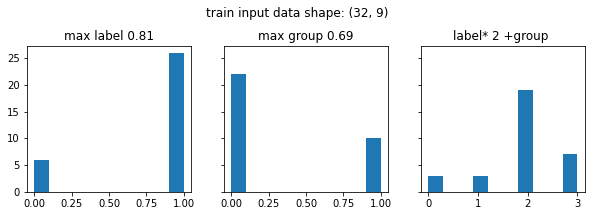

data loader 2


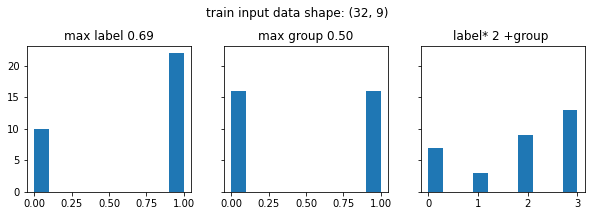

data loader 3


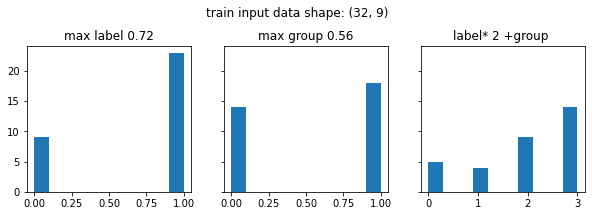

data loader 4


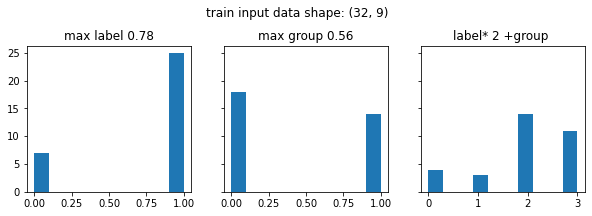

data loader 5


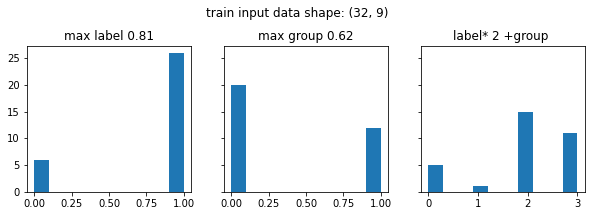

data loader 6


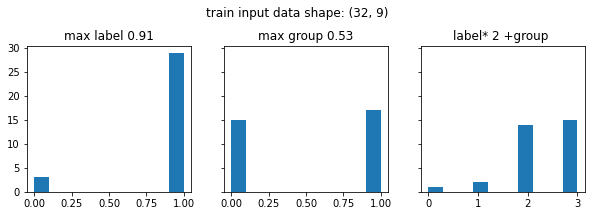

data loader 7


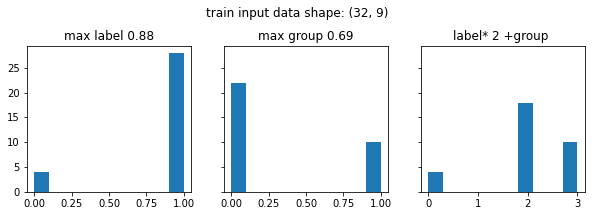

data loader 8


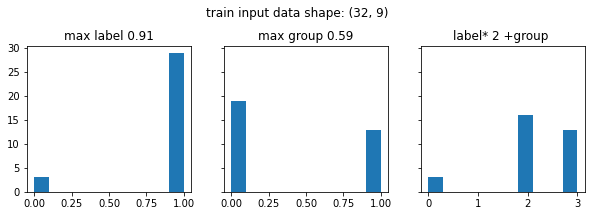

data loader 9


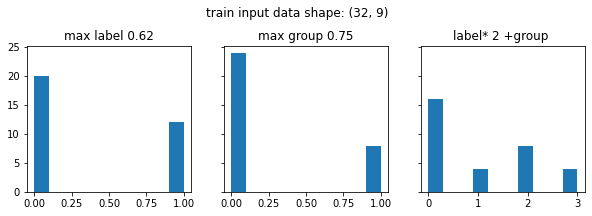

data loader 10


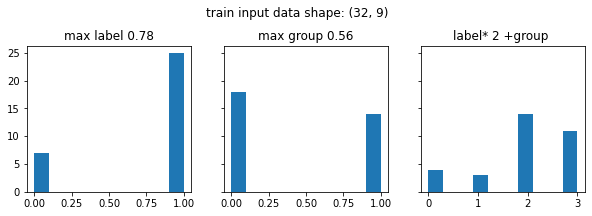

In [11]:
for i in range(len(dl_loaders)):
    print("data loader",i)
    x,y,z = dl2nparray(dl_loaders[i])
    dataset_description(x,y,z)

data cumulative loader 0


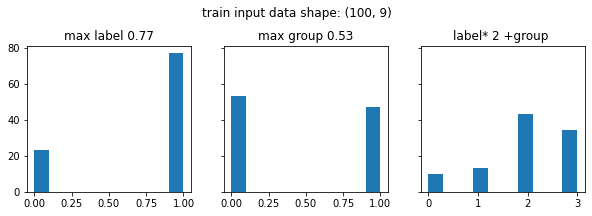

data cumulative loader 1


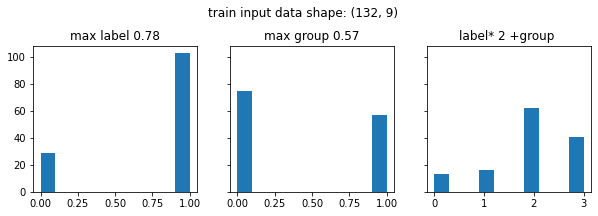

data cumulative loader 2


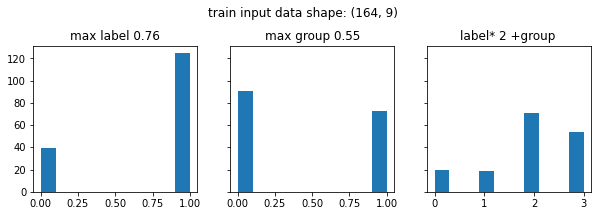

data cumulative loader 3


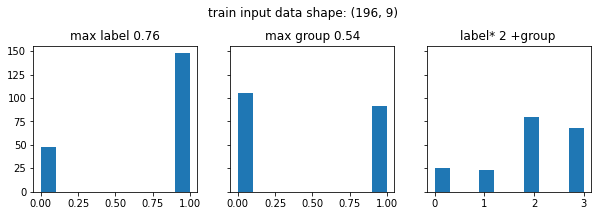

data cumulative loader 4


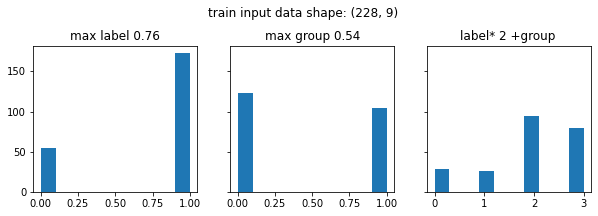

data cumulative loader 5


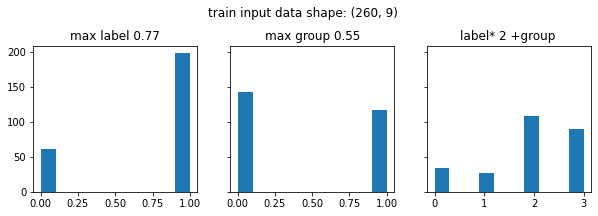

data cumulative loader 6


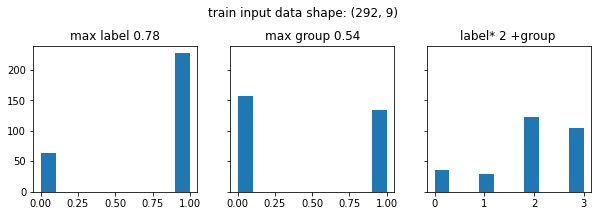

data cumulative loader 7


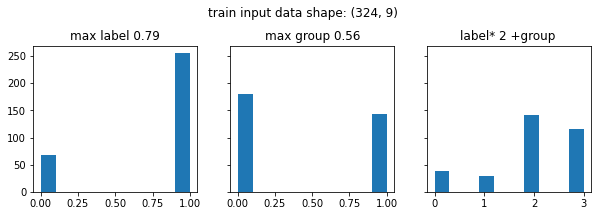

data cumulative loader 8


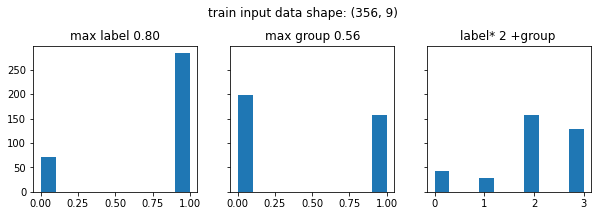

data cumulative loader 9


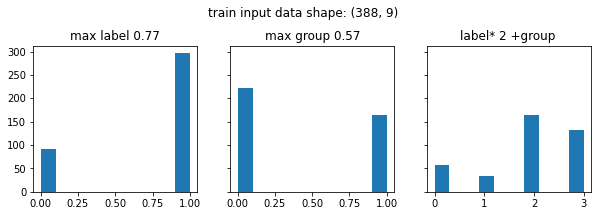

data cumulative loader 10


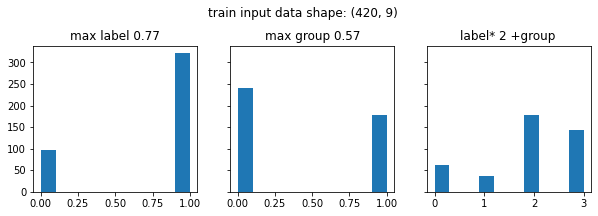

In [12]:
for i in range(len(dl_loaders)):
    print("data cumulative loader",i)
    x,y,z = dl2nparray(dl_cum_loaders[i])
    dataset_description(x,y,z)